In [1]:
import src.util as ut
import numpy as np

In [2]:
Xa, Ya = ut.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_a.csv', add_intercept=False)
Xb, Yb = ut.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_b.csv', add_intercept=False)
print(Xa.shape)
print(Ya.shape)

(100, 2)
(100,)


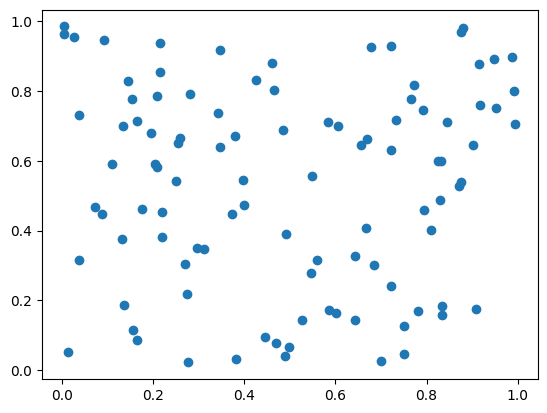

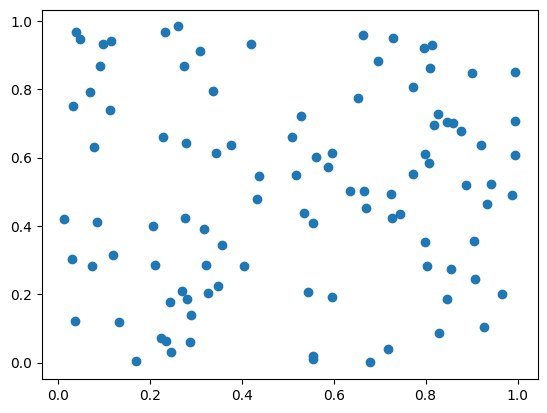

In [3]:
import matplotlib.pyplot as plt
plt.scatter(Xa[:,0], Xa[:,1])
plt.show()
plt.scatter(Xb[:,0], Xb[:,1])
plt.show()


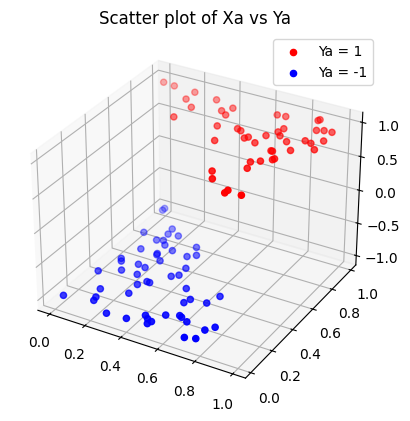

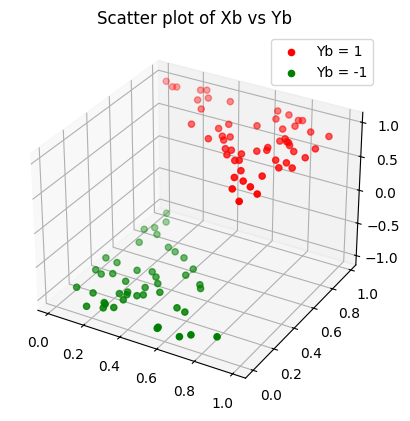

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Fixed typo in import

# Plot for Xa and Ya
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Separate points based on Ya labels
ax.scatter(Xa[Ya == 1, 0], Xa[Ya == 1, 1], Ya[Ya == 1], c='red', label='Ya = 1')
ax.scatter(Xa[Ya == -1, 0], Xa[Ya == -1, 1], Ya[Ya == -1], c='blue', label='Ya = -1')

ax.set_title('Scatter plot of Xa vs Ya')
ax.legend()

# Plot for Xb and Yb
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

# Separate points based on Yb labels
ax1.scatter(Xb[Yb == 1, 0], Xb[Yb == 1, 1], Yb[Yb == 1], c='red', label='Yb = 1')
ax1.scatter(Xb[Yb == -1, 0], Xb[Yb == -1, 1], Yb[Yb == -1], c='green', label='Yb = -1')  # Use green for variety

ax1.set_title('Scatter plot of Xb vs Yb')
ax1.legend()

plt.show()

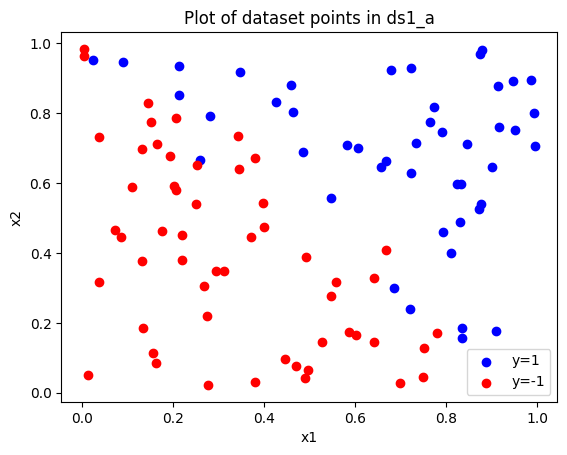

In [5]:
x1_pos = [x for x, label in zip(Xa[:,0], Ya) if label == 1]
x2_pos = [x for x, label in zip(Xa[:,1], Ya) if label == 1]

x1_neg = [x for x, label in zip(Xa[:,0], Ya) if label == -1]
x2_neg = [x for x, label in zip(Xa[:,1], Ya) if label == -1]

# Plot
plt.scatter(x1_pos, x2_pos, color='blue', label='y=1')
plt.scatter(x1_neg, x2_neg, color='red', label='y=-1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Plot of dataset points in ds1_a')
plt.show()

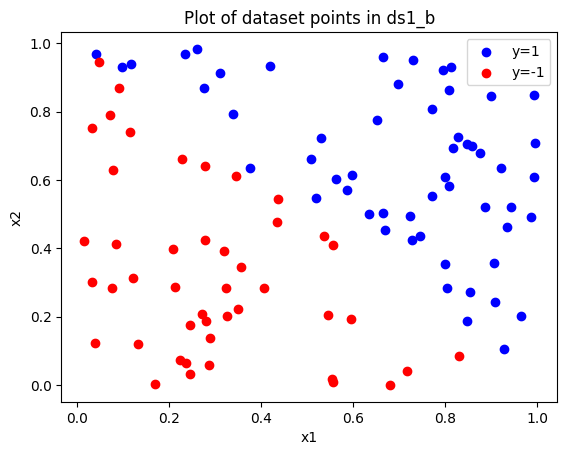

In [6]:
x1_pos = [x for x, label in zip(Xb[:,0], Yb) if label == 1]
x2_pos = [x for x, label in zip(Xb[:,1], Yb) if label == 1]

x1_neg = [x for x, label in zip(Xb[:,0], Yb) if label == -1]
x2_neg = [x for x, label in zip(Xb[:,1], Yb) if label == -1]

# Plot
plt.scatter(x1_pos, x2_pos, color='blue', label='y=1')
plt.scatter(x1_neg, x2_neg, color='red', label='y=-1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Plot of dataset points in ds1_b')
plt.show()

In [7]:
import numpy as np


def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return


In [8]:

Xa, Ya = ut.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_a.csv', add_intercept=True)
logistic_regression(Xa, Ya)

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30387 iterations


In [9]:
Xb, Yb = ut.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_b.csv', add_intercept=True)
logistic_regression(Xb, Yb)

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations
Finished 230000 iterations
Finished 240000 iterations
Finished 250000 iterations
Finished 260000 iterations
Finished 270000 iterations
Finished 280000 iterations
Finished 290000 iterations
Finished 300000 iterations
Finished 310000 iterations
Finished 320000 iterations
Finished 330000 iterations
Finished 340000 iterations
Finished 350000 iterations
Finished 360000 iterations
Finished 370000 iterations
Finished 3

KeyboardInterrupt: 

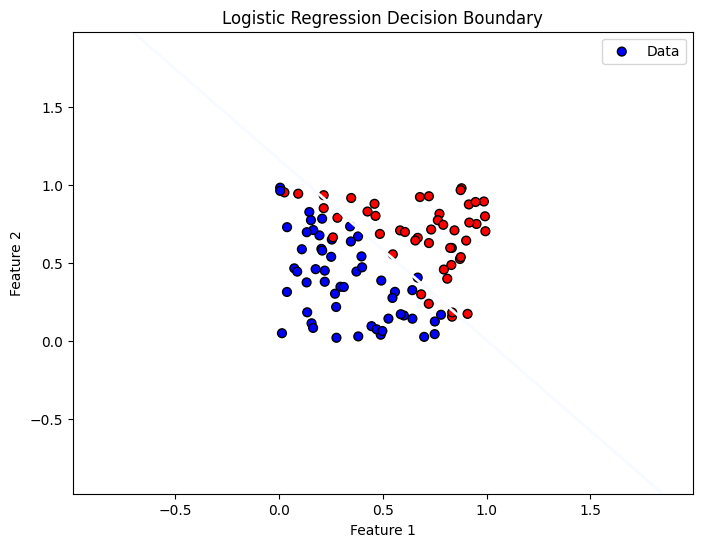

In [ ]:
from sklearn.linear_model import LogisticRegression as logreg
model = logreg(random_state=0)
Xa, Ya = ut.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_a.csv', add_intercept=False)
model.fit(Xa, Ya)
# 2. Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(Xa[:, 0], Xa[:, 1], c=Ya, cmap='bwr', edgecolor='k', s=40, label='Data')

# 3. Create a meshgrid to plot the decision boundary
x_min, x_max = Xa[:, 0].min() - 1, Xa[:, 0].max() + 1
y_min, y_max = Xa[:, 1].min() - 1, Xa[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# 4. Predict probabilities for each point in the meshgrid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# 5. Plot the decision boundary (where probability = 0.5)
plt.contour(xx, yy, probs, levels=[0.5], cmap="Blues", linewidths=2)

# 6. Finishing touches
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


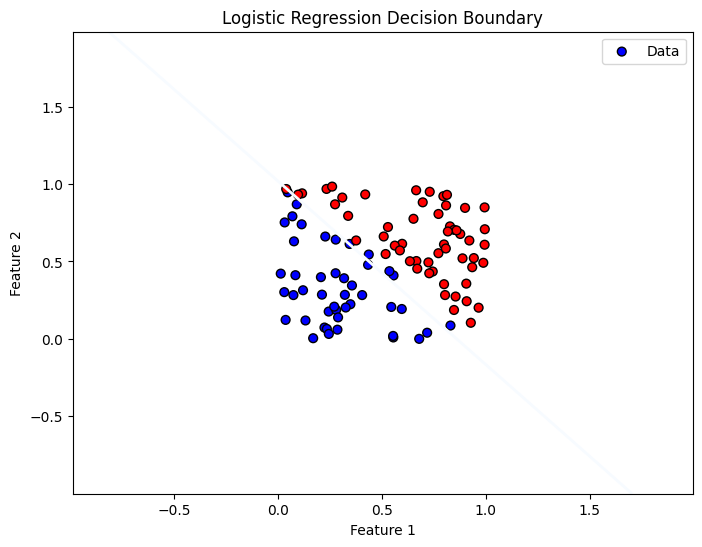

In [ ]:
model = logreg(random_state=0)
Xb, Yb = ut.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_b.csv', add_intercept=False)
model.fit(Xb, Yb)
# 2. Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(Xb[:, 0], Xb[:, 1], c=Yb, cmap='bwr', edgecolor='k', s=40, label='Data')

# 3. Create a meshgrid to plot the decision boundary
x_min, x_max = Xb[:, 0].min() - 1, Xb[:, 0].max() + 1
y_min, y_max = Xb[:, 1].min() - 1, Xb[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# 4. Predict probabilities for each point in the meshgrid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# 5. Plot the decision boundary (where probability = 0.5)
plt.contour(xx, yy, probs, levels=[0.5], cmap="Blues", linewidths=2)

# 6. Finishing touches
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()